## Customer churn prediction

#### The project seeks to address customer churn for ConnectTel Telecom company. Customer churn is the percentage of customers that have stopped using a company's product or service, including cancelling a subscription or membership during a certain time frame.

#### Problem definition and expected benefits;
ConnectTel Telecom Company is facing a critical issue of customer churn, which poses a substantial threat to its business sustainability and growth. The current customer retention strategies lack precision, leading to the loss of valuable customers to competitors. To address this challenge, This project aims to develop a robust customer churn prediction system using advanced analytics and machine learning techniques on available customer data. The goal is to accurately forecast customer churn and implement targeted retention initiatives.
<li> The project seeks to provide a solution that empowers ConnectTel with actionable insights derived from customer data, enabling them to predict churn, implement effective retention strategies, and ultimately strengthen their position in the telecommunications market.

#### Exploratory data analysis

Exploratory Data Analysis (EDA) is a pivotal phase in the data analysis process where the primary aim summarizing and understanding the main characteristics of a dataset. The purpose of EDA is to gain insights into the data, identify patterns, detect anomalies, and in some cases; formulate hypotheses that can be further investigated. EDA is typically performed using statistical graphics, charts, and descriptive statistics to visually and numerically explore the data.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn

In [3]:
churn = pd.read_excel("Customer-Churn.xlsx") #Reading the dataset

In [4]:
churn.head() #Checking the fisrt five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.tail() #Checking the last five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [7]:
churn.info() #Getting data information including columns, null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churn.describe() # Descriptive statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
churn_num = churn.select_dtypes(include=['int', 'float']) #Get numerical data from the dataset

In [10]:
churn_num.corr() #Get correlation details

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


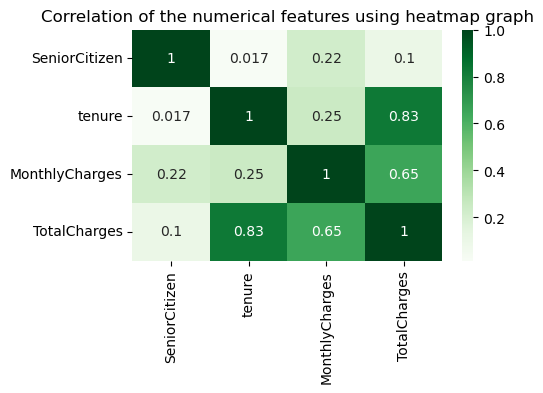

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
plt.title("Correlation of the numerical features using heatmap graph")
sns.heatmap(churn_num.corr(), annot=True, cmap="Greens")
plt.show()

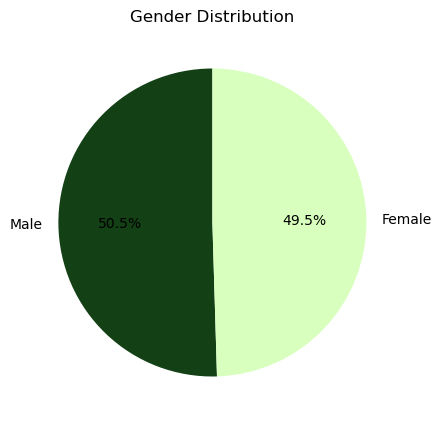

In [12]:
# Calculate the gender distribution
gender_distribution = churn['gender'].value_counts()

# Define custom colors for females and males
colors = ['#134015','#D8FFBE',]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution')
plt.show()

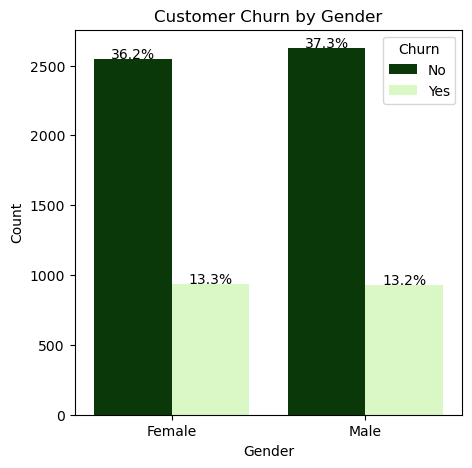

In [13]:
# Create a countplot to visualize the relationship between gender and customer churn
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='gender', hue='Churn', data=churn, palette=['#034001',"#D8FFBE"])

# Annotate the bars with percentage values
total = len(churn)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


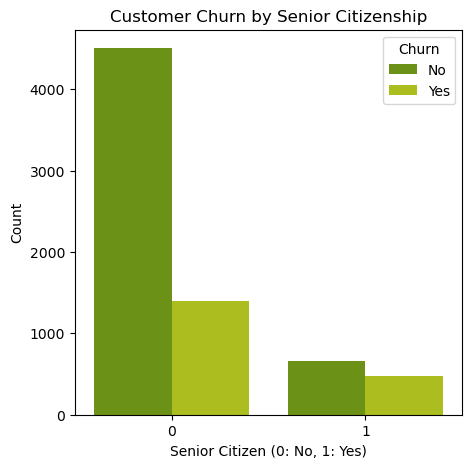

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn, palette=['#72A603',"#C0D904"])
plt.title('Customer Churn by Senior Citizenship')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

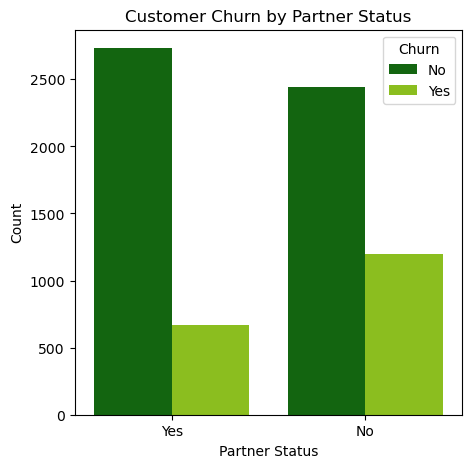

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Partner', hue='Churn', data=churn, palette=['#067302', '#95D904'])
plt.title('Customer Churn by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.show()

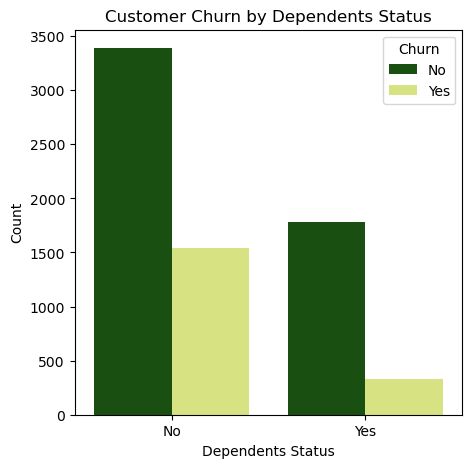

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Dependents', hue='Churn', data=churn, palette=['#135908',"#E3F272"])
plt.title('Customer Churn by Dependents Status')
plt.xlabel('Dependents Status')
plt.ylabel('Count')
plt.show()

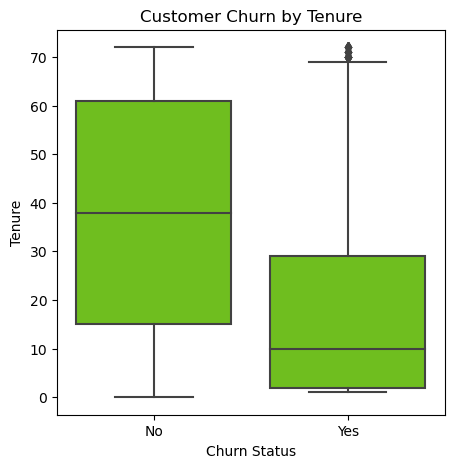

In [17]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Churn', y='tenure', data=churn, palette=['#6FD904'])
plt.title('Customer Churn by Tenure')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

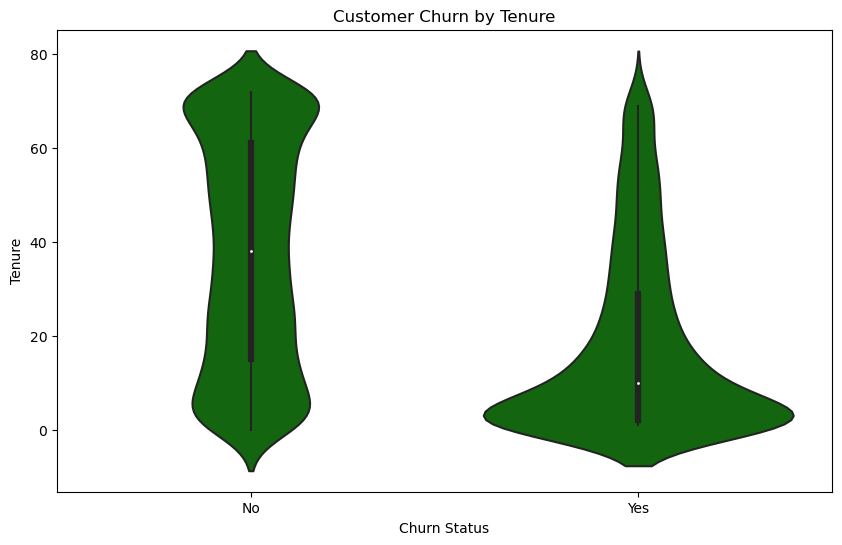

In [18]:
# Create a violin plot to visualize the relationship between tenure and customer churn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=churn, palette=['#067302'])
plt.title('Customer Churn by Tenure')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

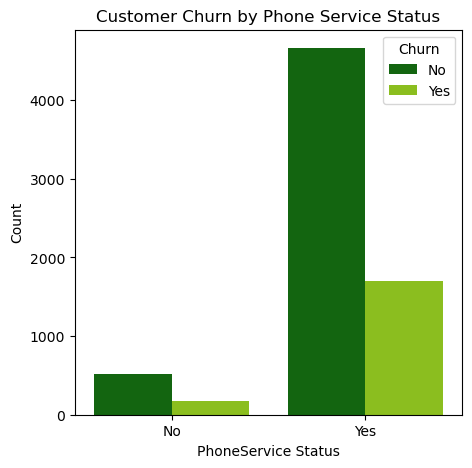

In [154]:
plt.figure(figsize=(5, 5))
sns.countplot(x='PhoneService', hue='Churn', data=churn, palette=['#067302', '#95D904'])
plt.title('Customer Churn by Phone Service Status')
plt.xlabel('PhoneService Status')
plt.ylabel('Count')
plt.show()

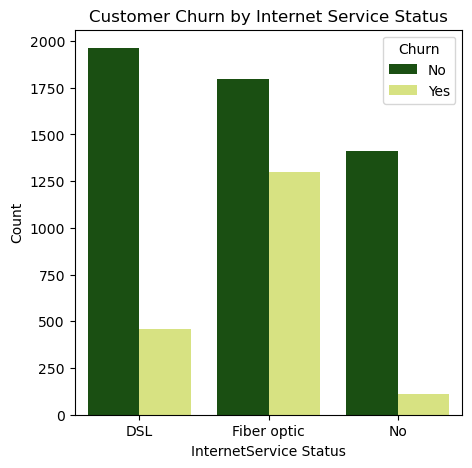

In [155]:
plt.figure(figsize=(5, 5))
sns.countplot(x='InternetService', hue='Churn', data=churn, palette=['#135908',"#E3F272"])
plt.title('Customer Churn by Internet Service Status')
plt.xlabel('InternetService Status')
plt.ylabel('Count')
plt.show()

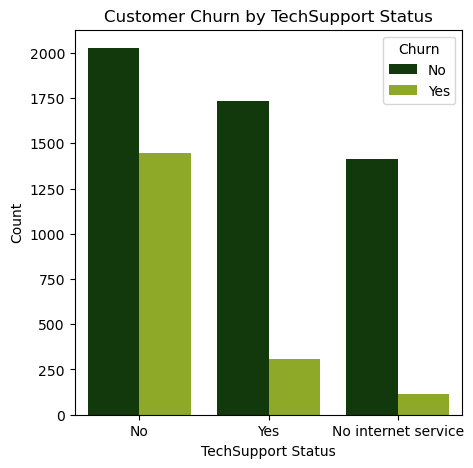

In [156]:
plt.figure(figsize=(5, 5))
sns.countplot(x='TechSupport', hue='Churn', data=churn, palette=['#0C4004',"#9ABF11"])
plt.title('Customer Churn by TechSupport Status')
plt.xlabel('TechSupport Status')
plt.ylabel('Count')
plt.show()

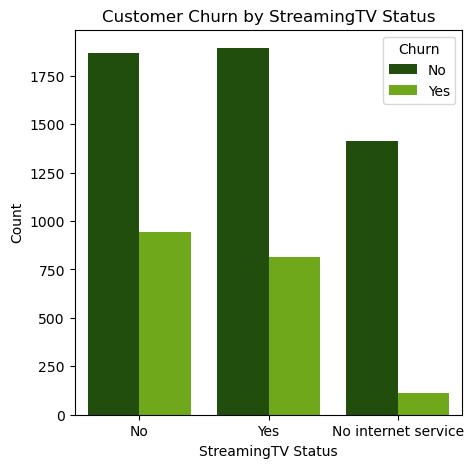

In [157]:
plt.figure(figsize=(5, 5))
sns.countplot(x='StreamingTV', hue='Churn', data=churn, palette=['#1D5902',"#74BF04"])
plt.title('Customer Churn by StreamingTV Status')
plt.xlabel('StreamingTV Status')
plt.ylabel('Count')
plt.show()

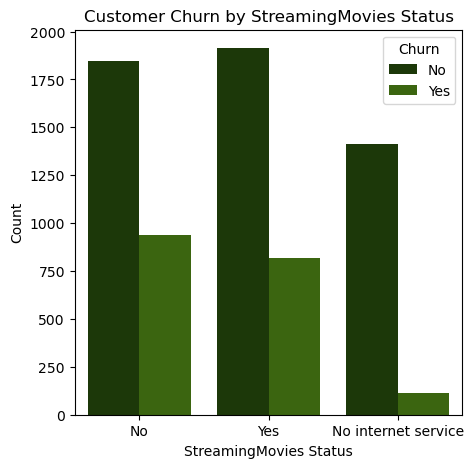

In [158]:
plt.figure(figsize=(5, 5))
sns.countplot(x='StreamingMovies', hue='Churn', data=churn, palette=['#1B4001', '#3B7302'])
plt.title('Customer Churn by StreamingMovies Status')
plt.xlabel('StreamingMovies Status')
plt.ylabel('Count')
plt.show()

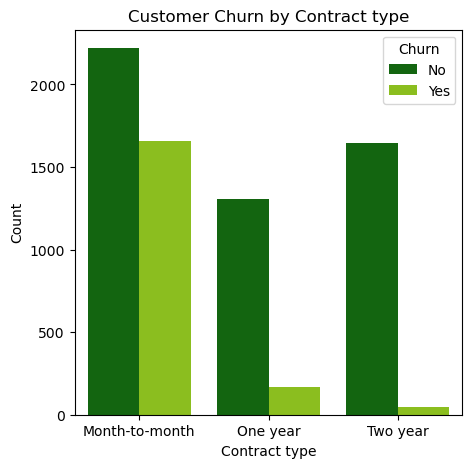

In [159]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Contract', hue='Churn', data=churn, palette=['#067302', '#95D904'])
plt.title('Customer Churn by Contract type')
plt.xlabel('Contract type')
plt.ylabel('Count')
plt.show()

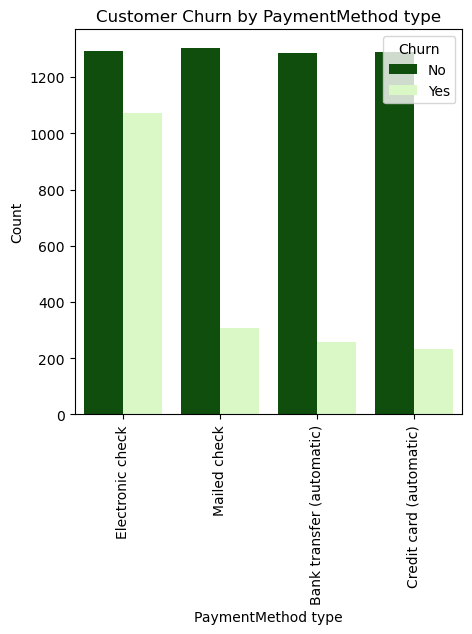

In [160]:
plt.figure(figsize=(5, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=churn, palette=['#055902', '#D8FFBE'])
plt.title('Customer Churn by PaymentMethod type')
plt.xlabel('PaymentMethod type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

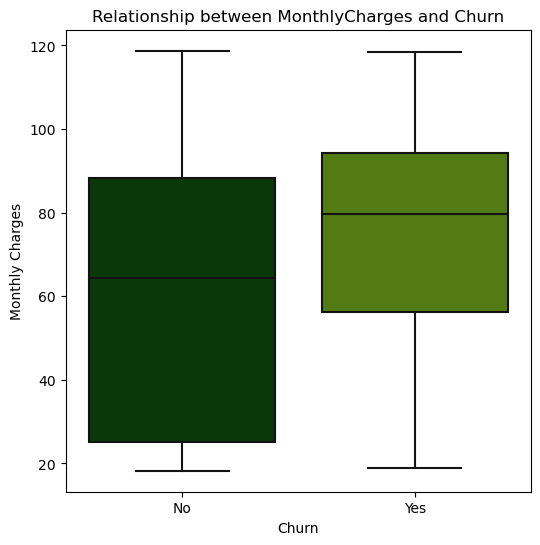

In [161]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn, palette=['#034001', '#558C03'])
plt.title('Relationship between MonthlyCharges and Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

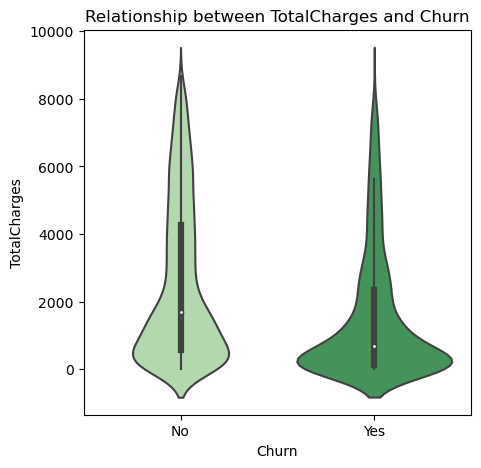

In [162]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='Churn', y='TotalCharges', data=churn, palette='Greens')
plt.title('Relationship between TotalCharges and Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()


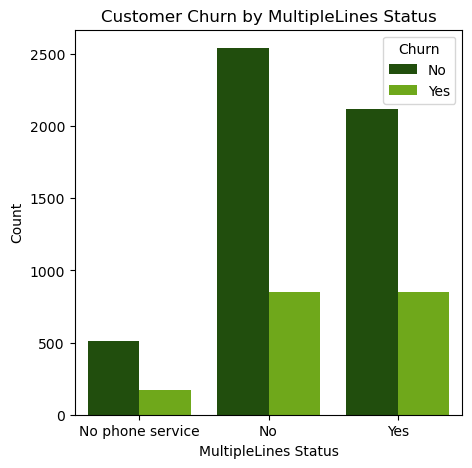

In [163]:
plt.figure(figsize=(5, 5))
sns.countplot(x='MultipleLines', hue='Churn', data=churn, palette=['#1D5902',"#74BF04"])
plt.title('Customer Churn by MultipleLines Status')
plt.xlabel('MultipleLines Status')
plt.ylabel('Count')
plt.show()

In [165]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Feature engineering
Feature engineering is a vital process in machine learning. It involves creation of novel features or adjustments to existing ones in a dataset. The aim is to enhance the performance of machine learning models by selecting, transforming, and innovating features. The ultimate goal is to render the data more apt for modeling, leading to heightened model accuracy and effectiveness.

##### Encoding categorical variables
Encoding categorical variables is an essential step in preprocessing data for machine learning models. Usually, machine learning algorithms require numerical input, making it crucial to convert categorical variables to numeric formats. Encoding prevents the misinterpretation of categorical variables as ordinal and may cause an incorrect assumption of relationships between categories. 

In [19]:
churn["gender"] = churn["gender"].map({'Male':1, 'Female':0})

In [20]:
import pandas as pd

churn_new = pd.get_dummies(churn, columns=["Partner", "Dependents", "PhoneService"], prefix=["Partner", "Dependents", "PhoneService"], dtype=int)


In [21]:
churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7032 non-null   float64


In [22]:
# Define a mapping function to convert values to integers
def map_multiple_lines(value):
    if value == 'No phone service':
        return 0
    elif value == 'No':
        return 1
    elif value == 'Yes':
        return 2
    else:
        return -1  # Handle any other values as needed

# Apply the mapping function to the 'MultipleLines' column
churn_new['MultipleLines'] = churn_new['MultipleLines'].map(map_multiple_lines).astype(int)



In [23]:
# Convert object columns to int using factorize
churn_new['MultipleLines'] = churn_new['MultipleLines'].astype('category').cat.codes
churn_new['InternetService'] = churn_new['InternetService'].astype('category').cat.codes
churn_new['OnlineSecurity'] = churn_new['OnlineSecurity'].astype('category').cat.codes
churn_new['OnlineBackup'] = churn_new['OnlineBackup'].astype('category').cat.codes
churn_new['DeviceProtection'] = churn_new['DeviceProtection'].astype('category').cat.codes
churn_new['TechSupport'] = churn_new['TechSupport'].astype('category').cat.codes
churn_new['StreamingTV'] = churn_new['StreamingTV'].astype('category').cat.codes
churn_new['StreamingMovies'] = churn_new['StreamingMovies'].astype('category').cat.codes
churn_new['Contract'] = churn_new['Contract'].astype('category').cat.codes
churn_new['PaperlessBilling'] = churn_new['PaperlessBilling'].astype('category').cat.codes
churn_new['PaymentMethod'] = churn_new['PaymentMethod'].astype('category').cat.codes
churn_new['Churn'] = churn_new['Churn'].astype('category').cat.codes


In [24]:
churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   int8   
 5   InternetService   7043 non-null   int8   
 6   OnlineSecurity    7043 non-null   int8   
 7   OnlineBackup      7043 non-null   int8   
 8   DeviceProtection  7043 non-null   int8   
 9   TechSupport       7043 non-null   int8   
 10  StreamingTV       7043 non-null   int8   
 11  StreamingMovies   7043 non-null   int8   
 12  Contract          7043 non-null   int8   
 13  PaperlessBilling  7043 non-null   int8   
 14  PaymentMethod     7043 non-null   int8   
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7032 non-null   float64


CLASSIFIERS:
<li> Logistic Regressor
<li> XGBoost Classifier
<li> Random Forest Classifier
<li> Decision Tree Classifier
<li> CatBoost Classifier

In [25]:
churn_new.shape

(7043, 24)

In [26]:
churn_new = churn_new.dropna()

In [27]:
churn_new.shape

(7032, 24)

In [28]:
from sklearn.model_selection import train_test_split

X = churn_new.drop(columns = ["customerID","Churn"])

In [29]:
y = churn_new[["Churn"]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
!pip install catboost
!pip install xgboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.0 MB 16.3 MB/s eta 0:00:07
   ---------------------------------------- 1.0/101.0 MB 16.4 MB/s eta 0:00:07
    --------------------------------------- 1.8/101.0 MB 12.7 MB/s eta 0:00:08
    --------------------------------------- 2.1/101.0 MB 13.2 MB/s eta 0:00:08
   - -------------------------------------- 3.1/101.0 MB 14.3 MB/s eta 0:00:07
   - -------------------------------------- 3.1/101.0 MB 14.3 MB/s eta 0:00:07
   - --------

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 1.2/99.8 MB 15.0 MB/s eta 0:00:07
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
    --------------------------------------- 2.1/99.8 MB 19.1 MB/s eta 0:00:06
   - -------------------------------------- 3.1/99.8 MB 7.6 MB/s eta 0:00:13
   - --------------------

In [39]:
#Import Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
lr = LogisticRegression()
rf = RandomForestClassifier()
ct = CatBoostClassifier()
xg = XGBClassifier()
dt = DecisionTreeClassifier()

In [41]:
lr_fit = lr.fit(X_train, y_train)
rf_fit = rf.fit(X_train, y_train)
ct_fit = ct.fit(X_train, y_train)
xg_fit = xg.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)

C:\Users\Fadzi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fadzi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Fadzi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Learning rate set to 0.02154
0:	learn: 0.6781834	total: 137ms	remaining: 2m 16s
1:	learn: 0.6637641	total: 140ms	remaining: 1m 10s
2:	learn: 0.6507420	total: 144ms	remaining: 48s
3:	learn: 0.6378897	total: 148ms	remaining: 36.9s
4:	learn: 0.6251874	total: 152ms	remaining: 30.3s
5:	learn: 0.6148806	total: 156ms	remaining: 25.8s
6:	learn: 0.6043129	total: 159ms	remaining: 22.6s
7:	learn: 0.5944985	total: 163ms	remaining: 20.2s
8:	learn: 0.5857492	total: 166ms	remaining: 18.3s
9:	learn: 0.5769555	total: 170ms	remaining: 16.8s
10:	learn: 0.5684699	total: 174ms	remaining: 15.6s
11:	learn: 0.5602952	total: 178ms	remaining: 14.6s
12:	learn: 0.5525703	total: 182ms	remaining: 13.8s
13:	learn: 0.5453603	total: 185ms	remaining: 13.1s
14:	learn: 0.5384802	total: 190ms	remaining: 12.5s
15:	learn: 0.5323023	total: 194ms	remaining: 11.9s
16:	learn: 0.5262602	total: 197ms	remaining: 11.4s
17:	learn: 0.5204152	total: 201ms	remaining: 11s
18:	learn: 0.5169797	total: 203ms	remaining: 10.5s
19:	learn: 0.5

173:	learn: 0.3857108	total: 787ms	remaining: 3.74s
174:	learn: 0.3855731	total: 791ms	remaining: 3.73s
175:	learn: 0.3853348	total: 795ms	remaining: 3.72s
176:	learn: 0.3851377	total: 799ms	remaining: 3.71s
177:	learn: 0.3849056	total: 802ms	remaining: 3.71s
178:	learn: 0.3848074	total: 806ms	remaining: 3.7s
179:	learn: 0.3845779	total: 810ms	remaining: 3.69s
180:	learn: 0.3843877	total: 814ms	remaining: 3.68s
181:	learn: 0.3842027	total: 817ms	remaining: 3.67s
182:	learn: 0.3840486	total: 821ms	remaining: 3.66s
183:	learn: 0.3838999	total: 824ms	remaining: 3.66s
184:	learn: 0.3837089	total: 828ms	remaining: 3.65s
185:	learn: 0.3835081	total: 831ms	remaining: 3.64s
186:	learn: 0.3833124	total: 835ms	remaining: 3.63s
187:	learn: 0.3830913	total: 839ms	remaining: 3.62s
188:	learn: 0.3828877	total: 842ms	remaining: 3.61s
189:	learn: 0.3827400	total: 846ms	remaining: 3.6s
190:	learn: 0.3826643	total: 849ms	remaining: 3.6s
191:	learn: 0.3825233	total: 853ms	remaining: 3.59s
192:	learn: 0.3

336:	learn: 0.3635301	total: 1.38s	remaining: 2.72s
337:	learn: 0.3633627	total: 1.39s	remaining: 2.71s
338:	learn: 0.3632399	total: 1.39s	remaining: 2.71s
339:	learn: 0.3631952	total: 1.39s	remaining: 2.7s
340:	learn: 0.3631013	total: 1.4s	remaining: 2.7s
341:	learn: 0.3629008	total: 1.4s	remaining: 2.69s
342:	learn: 0.3628223	total: 1.4s	remaining: 2.69s
343:	learn: 0.3626743	total: 1.41s	remaining: 2.68s
344:	learn: 0.3625195	total: 1.41s	remaining: 2.68s
345:	learn: 0.3624488	total: 1.41s	remaining: 2.67s
346:	learn: 0.3623122	total: 1.42s	remaining: 2.67s
347:	learn: 0.3622059	total: 1.42s	remaining: 2.66s
348:	learn: 0.3620645	total: 1.42s	remaining: 2.66s
349:	learn: 0.3619755	total: 1.43s	remaining: 2.65s
350:	learn: 0.3619313	total: 1.43s	remaining: 2.65s
351:	learn: 0.3618122	total: 1.44s	remaining: 2.64s
352:	learn: 0.3616882	total: 1.44s	remaining: 2.64s
353:	learn: 0.3615876	total: 1.44s	remaining: 2.63s
354:	learn: 0.3615779	total: 1.44s	remaining: 2.62s
355:	learn: 0.361

499:	learn: 0.3454715	total: 1.98s	remaining: 1.98s
500:	learn: 0.3453458	total: 1.99s	remaining: 1.98s
501:	learn: 0.3452913	total: 1.99s	remaining: 1.97s
502:	learn: 0.3450964	total: 1.99s	remaining: 1.97s
503:	learn: 0.3450299	total: 2s	remaining: 1.97s
504:	learn: 0.3449716	total: 2s	remaining: 1.96s
505:	learn: 0.3448579	total: 2s	remaining: 1.96s
506:	learn: 0.3447446	total: 2.01s	remaining: 1.95s
507:	learn: 0.3446255	total: 2.01s	remaining: 1.95s
508:	learn: 0.3445115	total: 2.02s	remaining: 1.94s
509:	learn: 0.3444263	total: 2.02s	remaining: 1.94s
510:	learn: 0.3443286	total: 2.02s	remaining: 1.94s
511:	learn: 0.3442396	total: 2.02s	remaining: 1.93s
512:	learn: 0.3441540	total: 2.03s	remaining: 1.93s
513:	learn: 0.3440671	total: 2.03s	remaining: 1.92s
514:	learn: 0.3439720	total: 2.04s	remaining: 1.92s
515:	learn: 0.3438598	total: 2.04s	remaining: 1.91s
516:	learn: 0.3437612	total: 2.04s	remaining: 1.91s
517:	learn: 0.3436735	total: 2.05s	remaining: 1.91s
518:	learn: 0.3435557

663:	learn: 0.3292529	total: 2.59s	remaining: 1.31s
664:	learn: 0.3291807	total: 2.59s	remaining: 1.31s
665:	learn: 0.3290837	total: 2.6s	remaining: 1.3s
666:	learn: 0.3289662	total: 2.6s	remaining: 1.3s
667:	learn: 0.3288902	total: 2.6s	remaining: 1.29s
668:	learn: 0.3288426	total: 2.61s	remaining: 1.29s
669:	learn: 0.3287588	total: 2.61s	remaining: 1.29s
670:	learn: 0.3286026	total: 2.62s	remaining: 1.28s
671:	learn: 0.3285463	total: 2.62s	remaining: 1.28s
672:	learn: 0.3284339	total: 2.62s	remaining: 1.27s
673:	learn: 0.3283197	total: 2.63s	remaining: 1.27s
674:	learn: 0.3282506	total: 2.63s	remaining: 1.27s
675:	learn: 0.3282158	total: 2.63s	remaining: 1.26s
676:	learn: 0.3281460	total: 2.64s	remaining: 1.26s
677:	learn: 0.3280228	total: 2.64s	remaining: 1.25s
678:	learn: 0.3279280	total: 2.65s	remaining: 1.25s
679:	learn: 0.3277752	total: 2.65s	remaining: 1.25s
680:	learn: 0.3277116	total: 2.65s	remaining: 1.24s
681:	learn: 0.3276478	total: 2.66s	remaining: 1.24s
682:	learn: 0.327

829:	learn: 0.3137378	total: 3.21s	remaining: 657ms
830:	learn: 0.3136617	total: 3.21s	remaining: 653ms
831:	learn: 0.3136104	total: 3.22s	remaining: 649ms
832:	learn: 0.3134672	total: 3.22s	remaining: 645ms
833:	learn: 0.3133587	total: 3.22s	remaining: 642ms
834:	learn: 0.3132980	total: 3.23s	remaining: 638ms
835:	learn: 0.3131761	total: 3.23s	remaining: 634ms
836:	learn: 0.3130417	total: 3.23s	remaining: 630ms
837:	learn: 0.3129617	total: 3.24s	remaining: 626ms
838:	learn: 0.3128520	total: 3.24s	remaining: 622ms
839:	learn: 0.3128203	total: 3.24s	remaining: 618ms
840:	learn: 0.3127704	total: 3.25s	remaining: 614ms
841:	learn: 0.3126476	total: 3.25s	remaining: 610ms
842:	learn: 0.3125907	total: 3.25s	remaining: 606ms
843:	learn: 0.3124905	total: 3.26s	remaining: 602ms
844:	learn: 0.3124119	total: 3.26s	remaining: 599ms
845:	learn: 0.3123666	total: 3.27s	remaining: 595ms
846:	learn: 0.3122531	total: 3.27s	remaining: 591ms
847:	learn: 0.3121349	total: 3.27s	remaining: 587ms
848:	learn: 

994:	learn: 0.2997444	total: 3.81s	remaining: 19.2ms
995:	learn: 0.2996579	total: 3.82s	remaining: 15.3ms
996:	learn: 0.2995685	total: 3.82s	remaining: 11.5ms
997:	learn: 0.2994695	total: 3.83s	remaining: 7.67ms
998:	learn: 0.2993705	total: 3.83s	remaining: 3.83ms
999:	learn: 0.2992949	total: 3.83s	remaining: 0us


In [191]:
lr_pred = lr_fit.predict(X_test)
rf_pred = rf_fit.predict(X_test)
ct_pred = ct_fit.predict(X_test)
xg_pred = xg_fit.predict(X_test)
dt_pred = dt_fit.predict(X_test)

#### Model evaluation

In [202]:
correlation_matrix = churn_new.corr()


In [203]:
correlation_matrix

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
gender,1.000000,-0.001819,0.005285,-0.010284,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,...,0.016942,-0.013779,0.000048,-0.008545,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515
SeniorCitizen,-0.001819,1.000000,0.015683,0.113769,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,...,-0.038158,0.219874,0.102411,0.150541,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392
tenure,0.005285,0.015683,1.000000,0.259112,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,...,-0.370087,0.246862,0.825880,-0.354049,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877
MultipleLines,-0.010284,0.113769,0.259112,1.000000,0.186852,-0.004379,0.103152,0.093761,-0.004437,0.168380,...,-0.134147,0.491412,0.412495,0.036148,-0.118037,0.118037,0.019178,-0.019178,-0.674824,0.674824
InternetService,-0.002236,-0.032160,-0.029835,0.186852,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,...,0.084504,-0.322173,-0.175691,-0.047097,-0.000513,0.000513,-0.044030,0.044030,-0.387266,0.387266
OnlineSecurity,-0.014899,-0.127937,0.327283,-0.004379,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,...,-0.096593,-0.053576,0.254473,-0.289050,-0.150610,0.150610,-0.151198,0.151198,0.014163,-0.014163
OnlineBackup,-0.011920,-0.013355,0.372434,0.103152,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,...,-0.125534,0.119943,0.375556,-0.195290,-0.153045,0.153045,-0.090231,0.090231,-0.024040,0.024040
DeviceProtection,0.001348,-0.021124,0.372669,0.093761,0.045558,0.175789,0.187646,1.000000,0.240476,0.275947,...,-0.136460,0.163984,0.389066,-0.177883,-0.165614,0.165614,-0.079723,0.079723,-0.004718,0.004718
TechSupport,-0.006695,-0.151007,0.324729,-0.004437,-0.025626,0.284875,0.195581,0.240476,1.000000,0.161168,...,-0.104544,-0.008237,0.276890,-0.282232,-0.126488,0.126488,-0.132530,0.132530,0.018136,-0.018136
StreamingTV,-0.005624,0.031019,0.290572,0.168380,0.108190,0.044399,0.147085,0.275947,0.161168,1.000000,...,-0.104782,0.337156,0.392472,-0.036303,-0.136679,0.136679,-0.046214,0.046214,-0.056393,0.056393


In [192]:
from sklearn.metrics import accuracy_score

In [193]:
lr_acc = accuracy_score(lr_pred, y_test)
print(f"Accuracy Score for LR is {lr_acc} ")

Accuracy Score for LR is 0.8024164889836531 


In [194]:
rf_acc = accuracy_score(rf_pred, y_test)
print(f"Accuracy Score for Random Forest is {rf_acc} ")

Accuracy Score for Random Forest is 0.7917555081734187 


In [195]:
ct_acc = accuracy_score(ct_pred, y_test)
print(f"Accuracy Score for CatBoost is {ct_acc} ")

Accuracy Score for CatBoost is 0.7981520966595593 


In [196]:
xg_acc = accuracy_score(xg_pred, y_test)
print(f"Accuracy Score for XGBoost is {xg_acc} ")

Accuracy Score for XGBoost is 0.7938877043354655 


In [197]:
dt_acc = accuracy_score(dt_pred, y_test)
print(f"Accuracy Score for Decision Tree is {dt_acc} ")

Accuracy Score for Decision Tree is 0.7341862117981521 


#### Metrics that are most important for the problem, based on the models

Positive Correlations with Churn:
The features below have a weak positive correlation with customer churn
MonthlyCharges: 0.19
SeniorCitizen: 0.15
PaperlessBilling: 0.19
PaymentMethod (Electronic check): 0.11

Negative Correlations with Churn:
The features below have weak to moderate negative correlation with customer churn
Contract (Longer-term contracts): -0.40
Tenure: -0.35
Partner_Yes: -0.15
Dependents_Yes: -0.16

These features have a notable impact on customer churn prediction. Notably, longer-term contracts, higher tenure, having a partner or dependents, and lower monthly charges are associated with lower churn. Conversely, having a month-to-month contract, higher monthly charges, being a senior citizen, using paperless billing, and using electronic check as the payment method are associated with higher churn.

It is important to note that correlation does not imply causation, and the importance of features may differ based on the model and other factors. It would be interesting to consider using machine learning algorithms for a more thorough evaluation of feature importance.